# Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.




In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle

import warnings
warnings.filterwarnings("ignore")

In [21]:
df = wrangle.wrangle_zillow()

In [29]:
df = wrangle.remove_outliers(df, 1.5, ['calculatedfinishedsquarefeet','lotsizesquarefeet','yearbuilt'])

## Ask Questions
Target: Logerror
- Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- Is logerror significantly different for older properties vs newer properties?
- Is logerror significantly different for properties with more than the mean bedrooms vs under the mean bedrooms?
- Is logerror significantly different for properties 
- Is logerror significantly different for properties 

### 1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?



$H_0$: Means of the logerror for the counties are all equal.

$H_a$: Means of the logerror for the counties are NOT all equal.

In [18]:
alpha = 0.5

In [32]:
train, validate, test = wrangle.split_data(df)

In [33]:
f, p = stats.f_oneway(train[train.county == 'Los_Angeles'].logerror, train[train.county == 'Orange'].logerror, train[train.county == 'Ventura'].logerror)

In [48]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


### 2. Is logerror significantly different for older properties vs newer properties?



$H_0$: Means of the logerror for older houses == newer houses.

$H_a$: Means of the logerror for older houses != newer houses.

In [45]:
print(train[train.yearbuilt < 1990].logerror.var())
print(train[train.yearbuilt >= 1990].logerror.var())

0.027859502341112872
0.01565494341339703


In [46]:
f, p = stats.ttest_ind(train[train.yearbuilt < 1990].logerror, train[train.yearbuilt >= 1990].logerror, equal_var=False)

In [47]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


In [77]:
bin_age = pd.qcut(train.yearbuilt,(0.25,0.5,0.75))


In [ ]:
sns.relplot(x)

### 3. Is logerror significantly different for properties with more than mean bedrooms vs under mean bedrooms?



$H_0$: Means of the logerror for properties with > mean beds == properties with < mean beds.

$H_a$: Means of the logerror for properties with > mean beds != properties with < mean beds.

In [54]:
print(train[train.bedroomcnt > train.bedroomcnt.mean()].logerror.var())
print(train[train.bedroomcnt <= train.bedroomcnt.mean()].logerror.var())

0.02593178530772894
0.02636823851858377


In [55]:
f, p = stats.ttest_ind(train[train.bedroomcnt > train.bedroomcnt.mean()].logerror, train[train.bedroomcnt <= train.bedroomcnt.mean()].logerror)

In [53]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


<AxesSubplot:ylabel='logerror'>

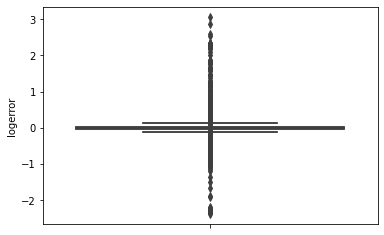

In [61]:
sns.boxplot(y = train[train.bedroomcnt > train.bedroomcnt.mean()].logerror, data = train)
sns.boxplot(y = train[train.bedroomcnt <= train.bedroomcnt.mean()].logerror, data = train)